In [1]:
#Importando as bibliotecas necessárias
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
# Lendo o banco de dados necessário.
filename = 'perfil_eleitor_deficiencia_2020_SP.csv'
df = pd.read_csv(filename, delimiter=';', 
                 encoding='ISO-8859-1',
                 error_bad_lines=False)

In [3]:
#Alguns dados do banco de dados utilizado.
df.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SQ_ELEITOR,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,NR_SECAO,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,ST_ELEITOR_BIOMETRIA,CD_TIPO_DEFICIENCIA,DS_TIPO_DEFICIENCIA
200673,01/08/2020,13:21:54,2020,330343619,SP,72338,VÁRZEA PAULISTA,0,Sem biometria,242,171,4,FEMININO,1,SOLTEIRO,4549,45 a 49 anos,6,ENSINO MÉDIO COMPLETO,S,5,DEFICIÊNCIA AUDITIVA
199334,01/08/2020,13:21:54,2020,369143449,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,282,110,4,FEMININO,5,VIÚVO,6064,60 a 64 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,S,2,DEFICIÊNCIA DE LOCOMOÇÃO
339014,01/08/2020,13:21:54,2020,257938950,SP,71072,SÃO PAULO,0,Sem biometria,373,44,4,FEMININO,3,CASADO,7579,75 a 79 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,S,3,OUTROS
74093,01/08/2020,13:21:54,2020,417787151,SP,65692,ITATIBA,0,Sem biometria,58,252,2,MASCULINO,3,CASADO,7074,70 a 74 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,S,2,DEFICIÊNCIA DE LOCOMOÇÃO
113086,01/08/2020,13:21:54,2020,335893210,SP,67130,MOGI DAS CRUZES,0,Sem biometria,287,140,4,FEMININO,3,CASADO,4549,45 a 49 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,S,2,DEFICIÊNCIA DE LOCOMOÇÃO
120069,01/08/2020,13:21:54,2020,412728194,SP,71072,SÃO PAULO,0,Sem biometria,3,112,4,FEMININO,1,SOLTEIRO,3539,35 a 39 anos,8,SUPERIOR COMPLETO,S,3,OUTROS
432863,01/08/2020,13:21:54,2020,340726209,SP,71455,SOROCABA,0,Sem biometria,356,317,4,FEMININO,3,CASADO,5559,55 a 59 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,S,2,DEFICIÊNCIA DE LOCOMOÇÃO
251373,01/08/2020,13:21:54,2020,307078456,SP,71072,SÃO PAULO,0,Sem biometria,413,347,4,FEMININO,5,VIÚVO,7074,70 a 74 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,S,3,OUTROS
374807,01/08/2020,13:21:54,2020,287738740,SP,71072,SÃO PAULO,0,Sem biometria,413,50,2,MASCULINO,1,SOLTEIRO,5559,55 a 59 anos,8,SUPERIOR COMPLETO,S,3,OUTROS
415333,01/08/2020,13:21:54,2020,422780945,SP,71811,TATUÍ,0,Sem biometria,140,250,4,FEMININO,3,CASADO,3034,30 a 34 anos,6,ENSINO MÉDIO COMPLETO,S,3,OUTROS


In [4]:
#Quantidade de linhas e colunas
df.shape

(444130, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444130 entries, 0 to 444129
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   DT_GERACAO            444130 non-null  object
 1   HH_GERACAO            444130 non-null  object
 2   ANO_ELEICAO           444130 non-null  int64 
 3   SQ_ELEITOR            444130 non-null  int64 
 4   SG_UF                 444130 non-null  object
 5   CD_MUNICIPIO          444130 non-null  int64 
 6   NM_MUNICIPIO          444130 non-null  object
 7   CD_MUN_SIT_BIOMETRIA  444130 non-null  int64 
 8   DS_MUN_SIT_BIOMETRIA  444130 non-null  object
 9   NR_ZONA               444130 non-null  int64 
 10  NR_SECAO              444130 non-null  int64 
 11  CD_GENERO             444130 non-null  int64 
 12  DS_GENERO             444130 non-null  object
 13  CD_ESTADO_CIVIL       444130 non-null  int64 
 14  DS_ESTADO_CIVIL       444130 non-null  object
 15  CD_FAIXA_ETARIA  

<AxesSubplot:title={'center':'Tipos de deficiência entre os eleitores no estado de São Paulo'}, ylabel='None'>

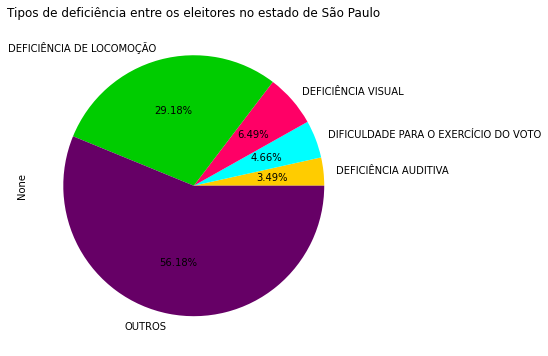

In [8]:
# tipos de deficiência entre os eleitores de São José dos Campos.
colors = ['#ffcc00', '#00ffff', '#ff0066', '#00cc00', '#660066']
df.groupby('DS_TIPO_DEFICIENCIA').size().sort_values().plot(kind='pie', autopct='%.2f%%', colors=colors,  figsize=(8, 6), title='Tipos de deficiência entre os eleitores no estado de São Paulo')

In [44]:
# Quantidade de cada tipo de deficiência
df.groupby('DS_TIPO_DEFICIENCIA').size().sort_values()

DS_TIPO_DEFICIENCIA
DEFICIÊNCIA AUDITIVA                     15484
DIFICULDADE PARA O EXERCÍCIO DO VOTO     20693
DEFICIÊNCIA VISUAL                       28844
DEFICIÊNCIA DE LOCOMOÇÃO                129575
OUTROS                                  249534
dtype: int64

<AxesSubplot:title={'center':'Quantidade de deficiêntes por gênero entre os eleitores do estado de São Paulo - 2020'}, ylabel='None'>

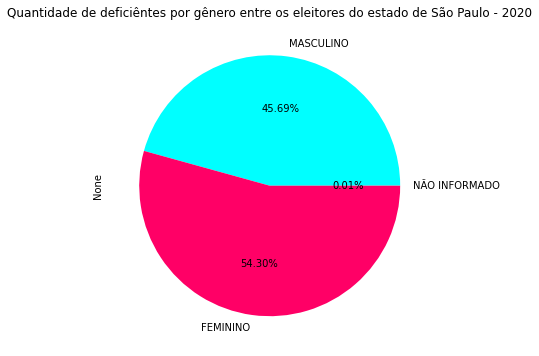

In [7]:
# Quantidade de eleitores por gênero no estado de São Paulo.
colors1 = ['#DC143C', '#248f8f','#DC143C']
df.groupby('DS_GENERO').size().sort_values().plot(kind='pie', autopct='%.2f%%', colors=colors,  figsize=(8, 6), title='Quantidade de deficiêntes por gênero entre os eleitores do estado de São Paulo - 2020')

<AxesSubplot:title={'center':'Relação tipo de deficiência e gênero entre os eleitores do estado de São Paulo nas eleições de 2020'}, ylabel='DEFICIENCIA_GENERO'>

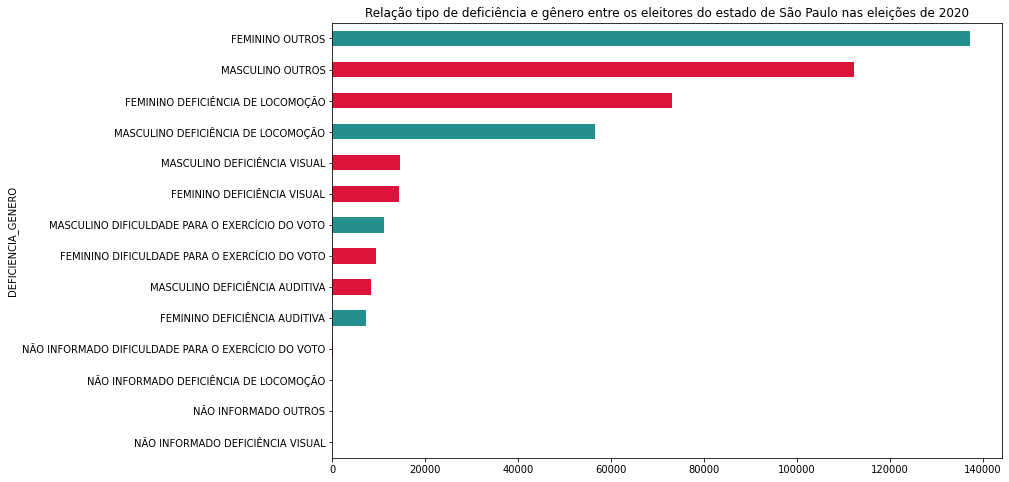

In [14]:
df['DEFICIENCIA_GENERO'] = df['DS_GENERO']+' '+df['DS_TIPO_DEFICIENCIA']
df.groupby('DEFICIENCIA_GENERO').size().sort_values().plot(kind='barh', stacked=True, title='Relação tipo de deficiência e gênero entre os eleitores do estado de São Paulo nas eleições de 2020', color=colors1, figsize=(12, 8))

Text(0.5, 1.0, 'Análise dos eleitores por zona eleitoral')

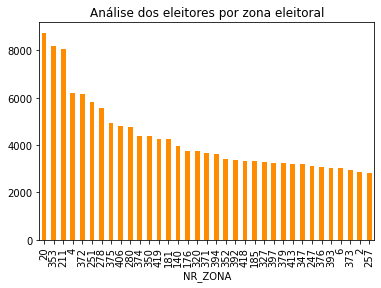

In [74]:
# Quantidade de eleitores com deficiência por zona eleitoral - SP(filtrado pelas zonas com mais casos)
df.groupby('NR_ZONA').size().sort_values(ascending=False).head(35).plot(kind='bar', color='#FF8C00').set_title('Análise dos eleitores por zona eleitoral')

Text(0.5, 1.0, 'Análise dos eleitores por seção eleitoral')

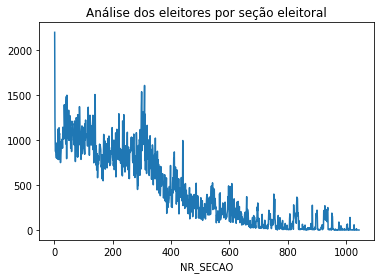

In [75]:
# Quantidade de eleitores com deficiência por seção eleitoral - SP
df.groupby('NR_SECAO').size().plot(kind='line').set_title('Análise dos eleitores por seção eleitoral')

Text(0.5, 1.0, 'Faixa etária dos eleitores do estado de SP')

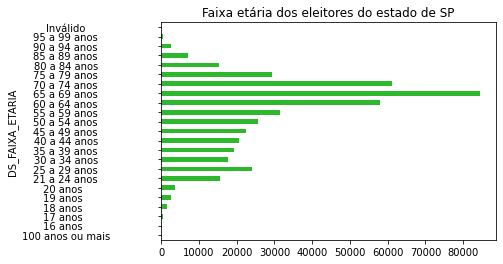

In [78]:
#Faixa etária dos eleitores deficiêntes no estado de São Paulo.
df.groupby('DS_FAIXA_ETARIA').size().plot(kind='barh', color='#2eb82e').set_title('Faixa etária dos eleitores do estado de SP')

Text(0.5, 1.0, 'Faixa etária dos eleitores do sexo masculino')

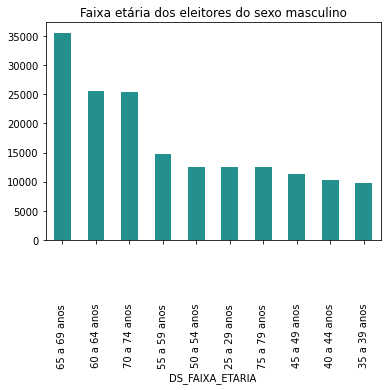

In [77]:
# Faixa etária dos eleitores do gênero masculino.
df.query('DS_GENERO == "MASCULINO"').groupby('DS_FAIXA_ETARIA').size().sort_values(ascending=False).head(10).plot(kind='bar', color='#248f8f').set_title('Faixa etária dos eleitores do sexo masculino')

Text(0.5, 1.0, 'Faixa etária dos eleitores do sexo feminino')

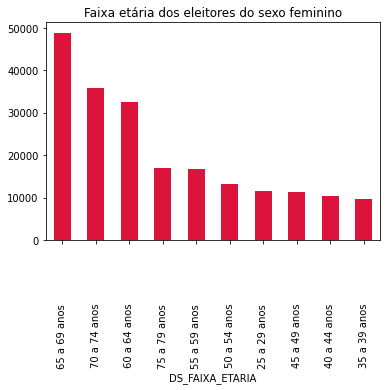

In [76]:
# Faixa etária dos eleitores do gênero feminino.
df.query('DS_GENERO == "FEMININO"').groupby('DS_FAIXA_ETARIA').size().sort_values(ascending=False).head(10).plot(kind='bar', color='#DC143C').set_title('Faixa etária dos eleitores do sexo feminino')